# BREAST CANCER CLASSIFICATION PROJECT

***BY: ANDERSON MTAWALI AND PETER KIGANYA***

CAPSTONE PROJECT

MACHINE LEARNING WITH LOGISTIC REGRESSION AND RANDOM FOREST

📘 Introduction

In this project, we will:

Prepare and clean breast cancer dataset

Visualize the data distribution

Train two ML models: Logistic Regression & RandoForest Model

Evaluate performance using accuracy, classification reports & confusion matrices

Compare models

🎯 Goal: Detect malignant tumors effectively.


---

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

Data Exploration

1.   Importing the necessary libraies and the data set
2.   Data cleaning and preparation
3.   exploratory data analysis
4.   Data preprosessing
5.   Model building and evaluation
6.   Model prediction




STEP ONE: IMPORTING NECESSARRY LIBRARIES AND IMPORTING THE DATA **SET**



In [1]:
import pandas as pd # for data preprocessing
import numpy as np #for numerical python
import matplotlib.pyplot as plt # for visualization
import seaborn as sns #visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Load the dataset
df = pd.read_csv("/content/data (2).csv")



2.   DATA CLEANING AND PREPARATION




The output below prints the first five rows of all the features in the dataset as shown in the table below. This is to get a glimpse of how the data look like.

In [37]:
# Display the first 5 rows
print("FIRST 5 ROWS OF THE DATA SET:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

FIRST 5 ROWS OF THE DATA SET:
| id       | diagnosis   | radius_mean   | texture_mean   | perimeter_mean   | area_mean   | smoothness_mean   | compactness_mean   | concavity_mean   | concave points_mean   | symmetry_mean   | fractal_dimension_mean   | radius_se   | texture_se   | perimeter_se   | area_se   | smoothness_se   | compactness_se   | concavity_se   | concave points_se   | symmetry_se   | fractal_dimension_se   | radius_worst   | texture_worst   | perimeter_worst   | area_worst   | smoothness_worst   | compactness_worst   | concavity_worst   | concave points_worst   | symmetry_worst   | fractal_dimension_worst   | Unnamed: 32   |
|:---------|:------------|:--------------|:---------------|:-----------------|:------------|:------------------|:-------------------|:-----------------|:----------------------|:----------------|:-------------------------|:------------|:-------------|:---------------|:----------|:----------------|:-----------------|:---------------|:------------------

The output below shows the output of the information present in the data set. As we can see the  data set has 569 entries which corresponds to the rows of the data set and 33 colunms which are the variables that are in the data set. We can also observe that the dataset has no missing values except for the last column named "unnamed: 32" which shows that it was included by mistake so we will need to reomeve it since it will not be need for analysis. The data type of all the variables is also displayed where the column "id" has integer data type which are positive whole numbers then we have object data type from the "diagnosis" which is text data that and the rest of the variables had float data type which stores decimal numbers.

In [38]:
#Checking the dtypes and other information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Here we removed the "id" and the "Unnamed: 32" columns in the data set because we do not need it in the analysis of the data. We printed the head of the data set again to confirm that the two colunms has been droped successfully.

In [39]:
#Remove the id column and the Unnamed: 32 column in the dataset
df = df.reset_index(drop=True).drop(["id", "Unnamed: 32"], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here we check the number of unique rows in the data set so as to understand it better. From the data set the diagnosis had 2 unique values which is "M" for malignant and "B" for benignin, while the rest of the data since they were discrete variables, they had several unque values.

In [40]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
diagnosis,2
smoothness_worst,411
symmetry_mean,432
radius_mean,456
radius_worst,457
smoothness_mean,474
texture_mean,479
concave points_worst,492
symmetry_se,498
fractal_dimension_mean,499


In [41]:
#checking for duplicates values
df.duplicated().any()

np.False_

The data had 569 rows and 31 columns that were to be used for the uilding of the model.

In [42]:
#checking the number of rows and columns
df.shape

(569, 31)

Below are the descriptive statistics of the variables in the data set. From the total count, mean, standard deviation, minimum value in each variable and quartiles, that is the 25%, 50% and the 75% and las is the maximum values in the data set which shows the largest outcome in every feature.

In [43]:
#Checking the descriptive stats of all the columns

display(df.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



STEP 3 EXPLORATORY DATA ANALYSIS

Here we expolre the data using some graphs like pie char, histogram and box plot so as to see how the data like like visual.

Values in 'diagnosis' column after mapping (1=Malignant, 0=Benign):
diagnosis
0    357
1    212
Name: count, dtype: int64


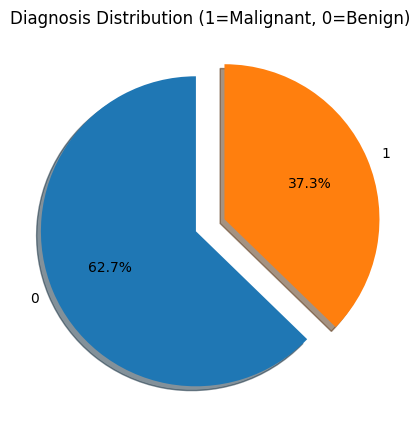

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# map 'M' to 1 and 'B' to 0 in the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("Values in 'diagnosis' column after mapping (1=Malignant, 0=Benign):")
print(df['diagnosis'].value_counts())

# Prepare explode based on the number of unique values
num_classes = len(df['diagnosis'].value_counts())
if num_classes > 1:
    explode = [0.1] * num_classes
else:
    explode = [0.1]

# Plot the pie chart with explode
plt.figure(figsize=(5,6))
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, explode=explode)
plt.title('Diagnosis Distribution (1=Malignant, 0=Benign)')
plt.ylabel('')
plt.show()

display(df.head()) # Display the dataframe to show the updated 'diagnosis' column

                                     Features Distribution                                      


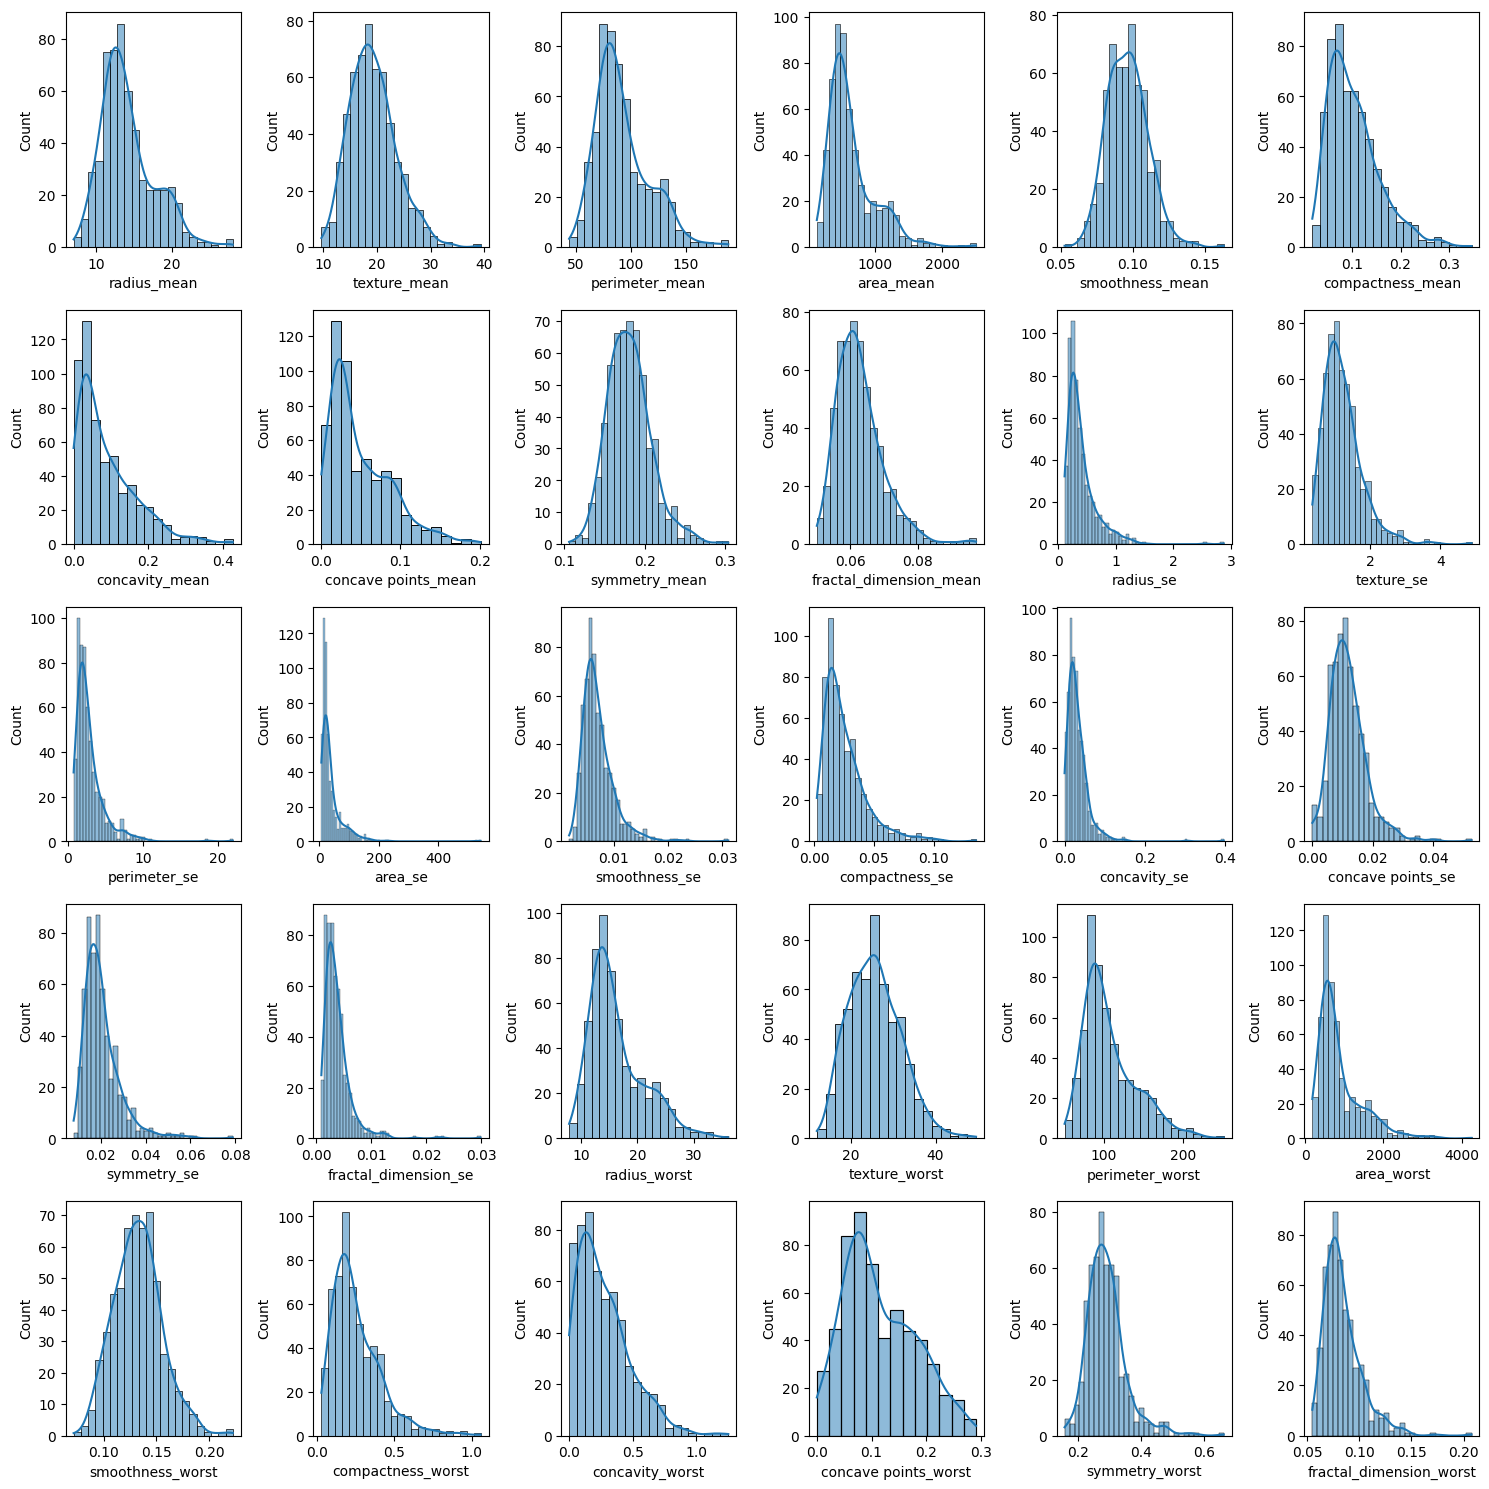

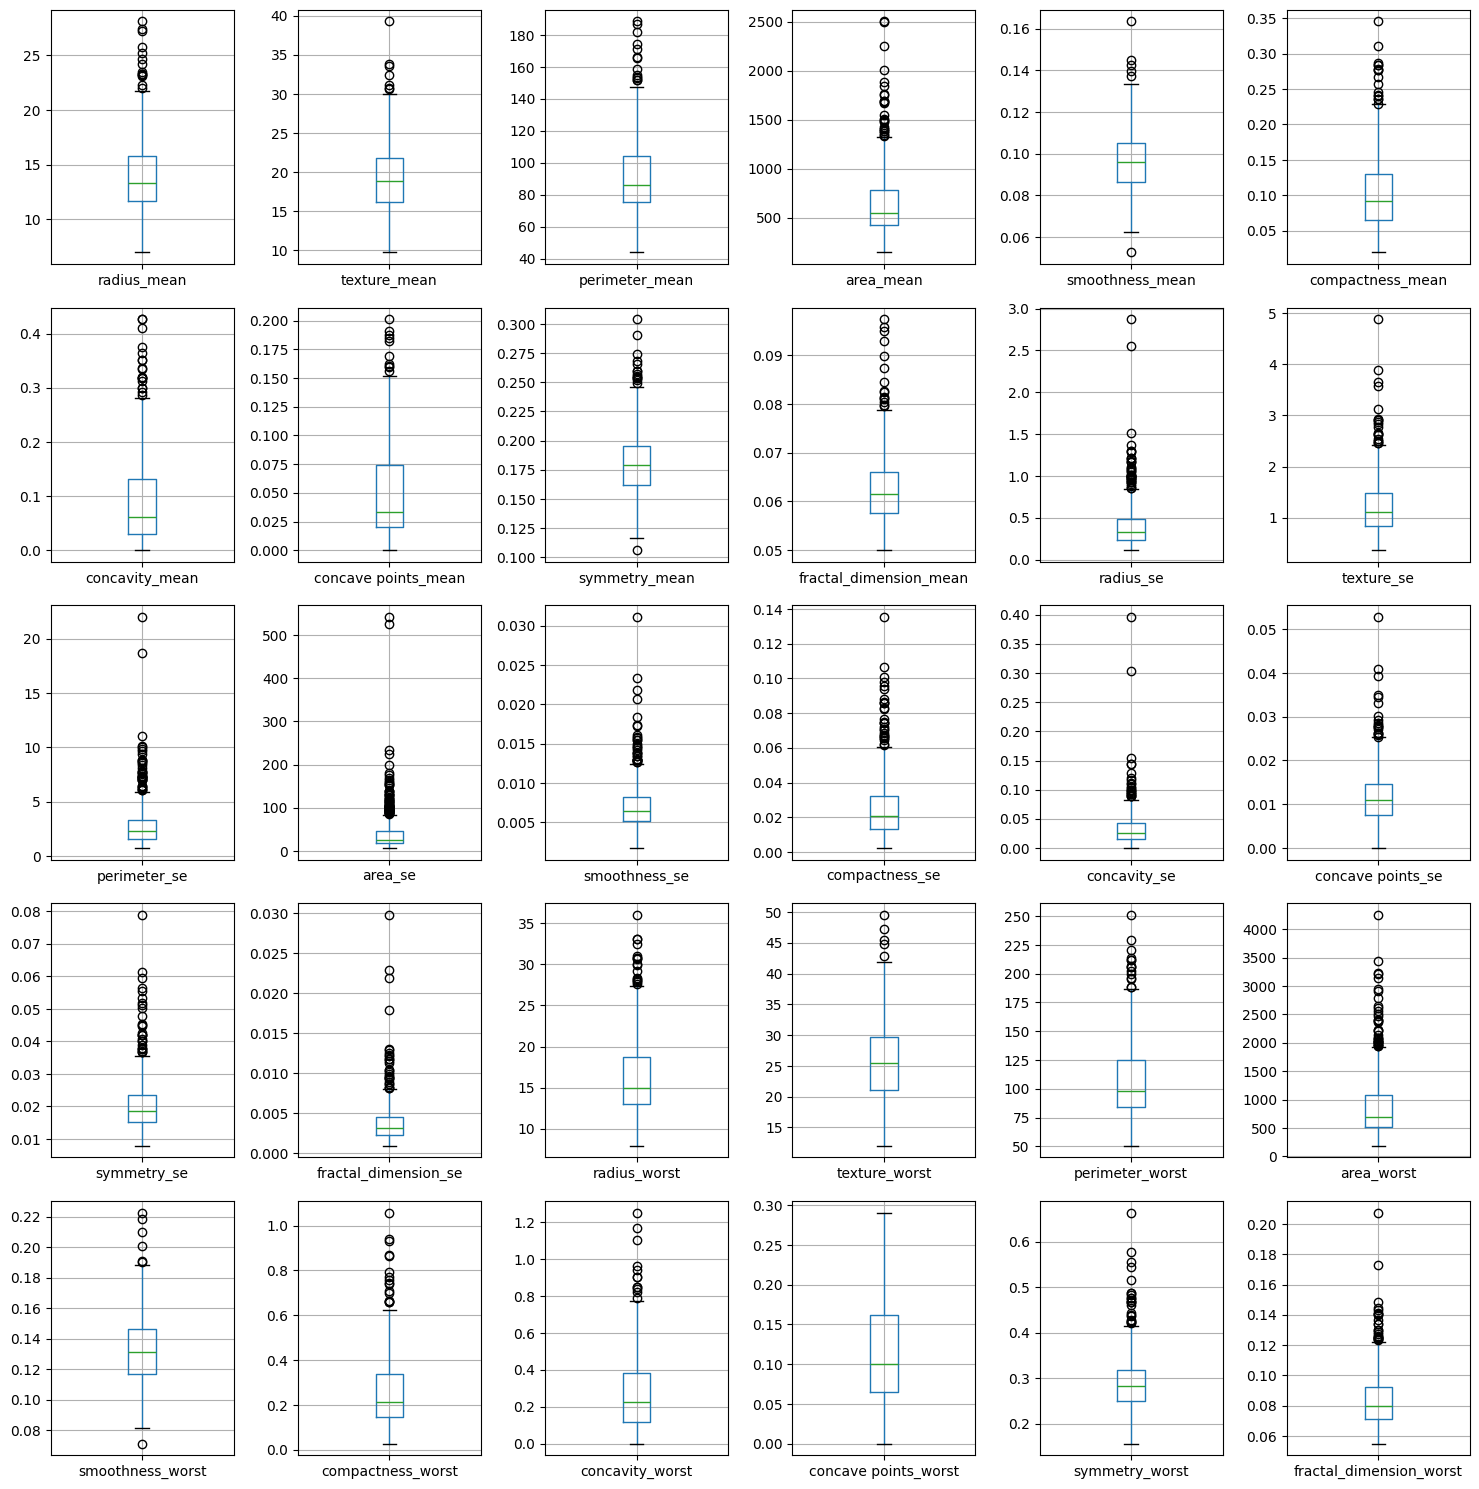

In [46]:
#Understanding the feature set
import math
import matplotlib.pyplot as plt
import seaborn as sns

print('\033[1mFeatures Distribution'.center(100))

n=6
features = df.columns # Define features here
cf = ['diagnosis'] # Define cf to exclude the target variable

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.histplot(df[nf[c]], kde=True) # Changed distplot to histplot
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers by removing them

In [47]:
#Removal of outlier:

for i in [i for i in df.columns]:
    if df[i].nunique()>=12:
        Q1 = df[i].quantile(0.15)
        Q3 = df[i].quantile(0.85)
        IQR = Q3 - Q1
        df = df[df[i] <= (Q3+(1.5*IQR))]
        df = df[df[i] >= (Q1-(1.5*IQR))]
df = df.reset_index(drop=True)
display(df.head())

print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


Inference: After removal of outliers, The dataset now has 502 samples.


STEP 4 DATA PREPROSESSING

Here we prepare the data for modeling.

In [49]:
X = df.drop(['diagnosis'],axis=1)
Y = df['diagnosis']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (502, 30) (502,) 
Training set  --->  (401, 30) (401,) 
Testing set   --->  (101, 30)  (101,)


Here we perform feature scaling of the features so as to be in a standard way so as to avoid the model giving importance to featuers with large values. We have used standardization method where the data is distributed with mean of 0 and standard deviation of 1.

In [50]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,...,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02,4.010000e+02
mean,-3.721047e-16,5.426527e-16,-5.083216e-16,4.562712e-16,-3.997910e-16,1.971269e-16,-6.423235e-17,-1.683331e-16,-4.274774e-16,-3.887165e-16,...,1.904822e-16,-4.208327e-16,-3.986836e-16,1.561511e-16,-9.302617e-17,1.771927e-16,-4.762054e-17,3.100872e-17,7.043410e-16,3.499556e-16
std,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,...,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00,1.001249e+00
min,-2.195500e+00,-2.070676e+00,-2.149686e+00,-1.614942e+00,-3.188737e+00,-1.581177e+00,-1.156192e+00,-1.280276e+00,-2.407827e+00,-2.172484e+00,...,-1.850869e+00,-2.227871e+00,-1.826069e+00,-1.340121e+00,-2.163384e+00,-1.397061e+00,-1.353619e+00,-1.751172e+00,-2.340683e+00,-1.703576e+00
25%,-6.548165e-01,-7.110959e-01,-6.588682e-01,-6.541901e-01,-7.374940e-01,-7.514041e-01,-7.268800e-01,-7.023922e-01,-7.375555e-01,-7.911689e-01,...,-6.348220e-01,-7.053894e-01,-6.561745e-01,-6.221726e-01,-7.458994e-01,-7.078030e-01,-7.505323e-01,-7.407766e-01,-6.992612e-01,-7.414559e-01
50%,-1.859557e-01,-1.037834e-01,-1.993434e-01,-2.677250e-01,-4.965293e-02,-2.076523e-01,-3.515982e-01,-3.736765e-01,-2.831962e-02,-1.069833e-01,...,-2.712120e-01,-2.853976e-02,-2.777926e-01,-3.384444e-01,-3.505252e-02,-2.447713e-01,-2.549151e-01,-2.690685e-01,-1.300417e-01,-1.812165e-01
75%,4.238913e-01,6.309897e-01,4.242289e-01,2.835202e-01,6.480906e-01,5.226245e-01,4.858693e-01,5.270415e-01,6.347530e-01,6.678107e-01,...,4.078478e-01,6.310873e-01,4.410627e-01,2.368751e-01,6.009684e-01,5.210709e-01,5.911213e-01,6.929810e-01,5.385325e-01,5.275285e-01
max,3.784607e+00,3.700042e+00,3.976193e+00,4.440377e+00,3.245585e+00,4.567198e+00,4.277745e+00,4.430463e+00,4.055032e+00,3.337984e+00,...,3.463617e+00,4.153117e+00,3.835267e+00,3.967060e+00,2.831718e+00,4.062804e+00,3.810633e+00,3.122026e+00,3.893823e+00,3.416703e+00



                                Standardardization on Testing set                                


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.291592,0.036223,0.300360,0.281287,0.227511,0.312053,0.276889,0.309826,0.051251,0.093512,...,0.279145,-0.030313,0.274121,0.262311,0.199853,0.208074,0.159964,0.205031,-0.004660,0.204162
std,1.052714,1.172643,1.060457,1.079557,0.951842,1.115479,1.133942,1.105077,0.994505,1.118455,...,1.051345,1.122519,1.049030,1.058135,0.987843,1.077104,1.059332,1.000195,1.052674,1.163876
min,-1.623358,-2.323098,-1.571682,-1.309819,-2.436149,-1.757872,-1.136761,-1.222952,-2.558907,-2.083725,...,-1.441988,-2.308817,-1.332207,-1.123448,-2.296200,-1.488057,-1.333148,-1.595743,-2.193721,-1.826040
25%,-0.467928,-0.886042,-0.482829,-0.499883,-0.436611,-0.537787,-0.636558,-0.561558,-0.599066,-0.646935,...,-0.584254,-0.900005,-0.548065,-0.578270,-0.390476,-0.516917,-0.664214,-0.647442,-0.786197,-0.611953
50%,0.125525,-0.063796,0.135467,0.010516,0.341876,0.268490,-0.102278,0.012920,0.009450,-0.049660,...,0.118886,-0.090541,0.065489,-0.033093,0.184749,0.005143,0.020047,0.053405,-0.032757,0.047524
75%,1.115707,0.803436,1.083777,1.128716,0.884226,0.903826,1.195422,1.129377,0.794226,0.610487,...,1.168780,0.837759,1.083399,1.099199,0.881566,0.802416,0.811777,0.874278,0.735172,0.773865
max,3.151809,2.700351,3.371807,3.766594,2.224869,2.922517,4.577189,3.734031,2.208501,3.084650,...,2.555796,2.603079,2.673445,2.940483,2.579180,3.917148,3.157813,2.836651,2.846459,3.726383


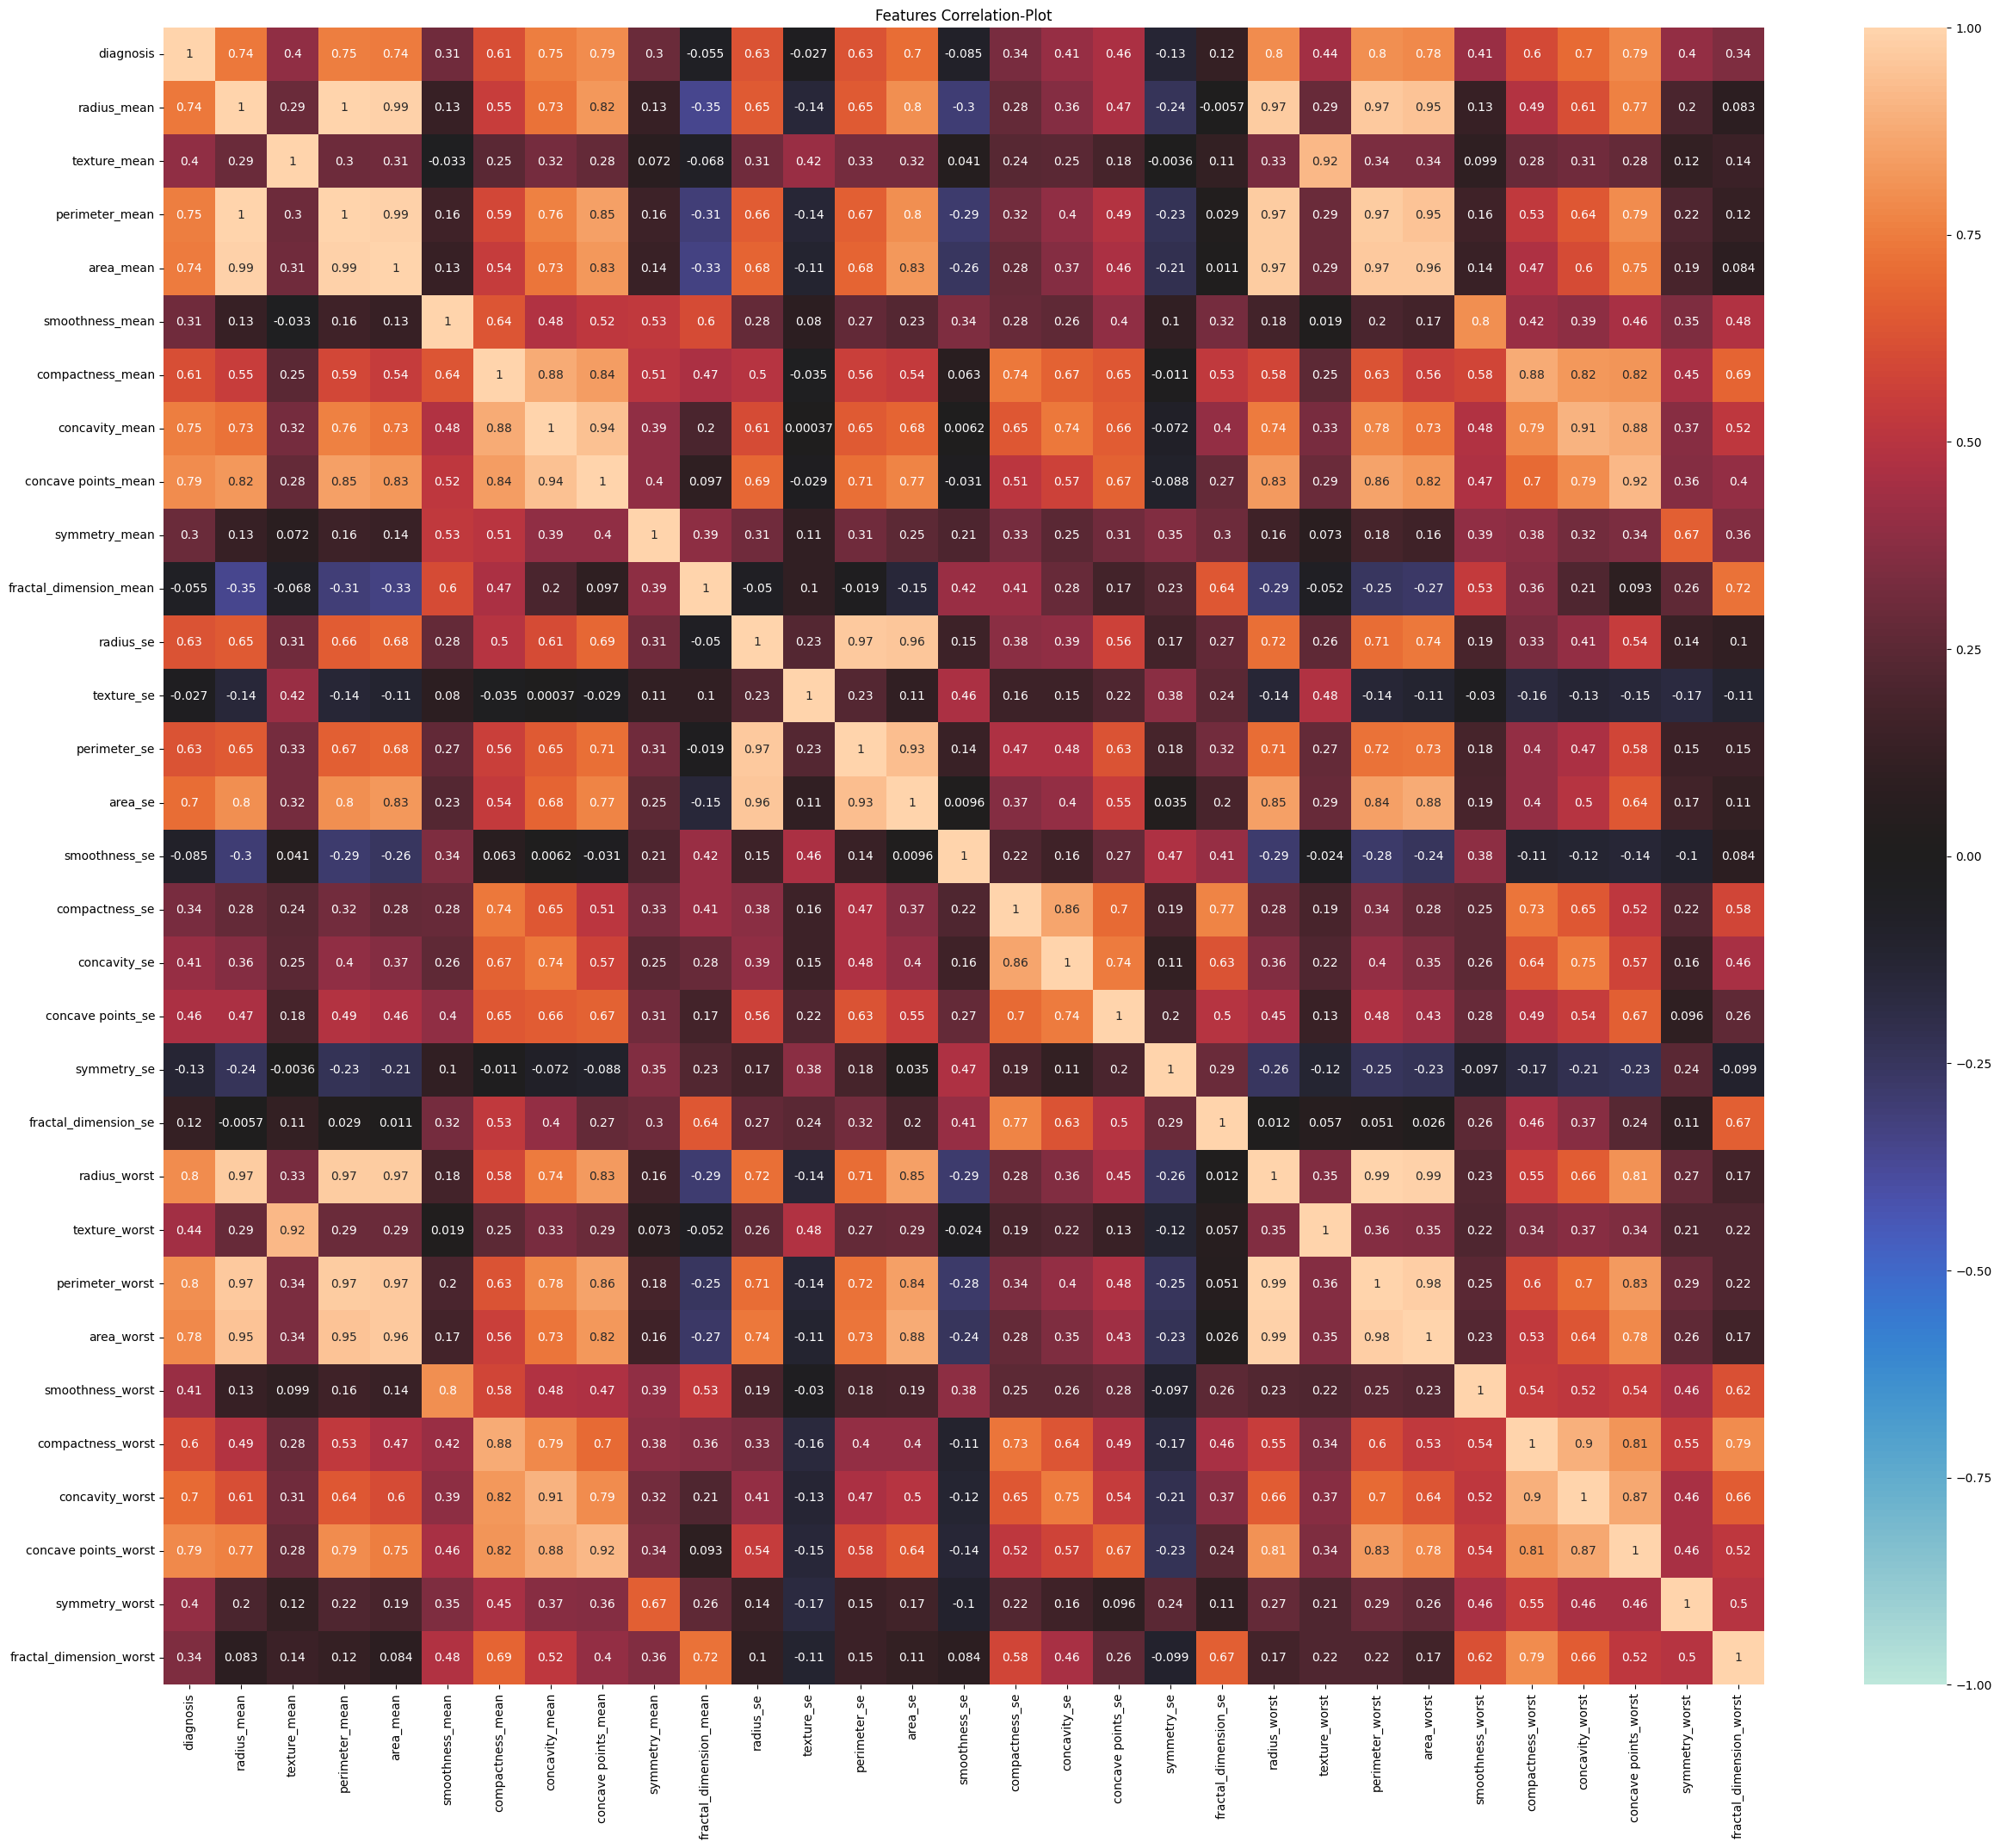

In [51]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

Inference: \ Correlation plt between the variables convey lot of information about the realationship betweem them. There seems to be strong multicollinearity in the dataset.






STEP 5 MODEL BUILDING AND EVALUATION

Building a ligistic model for the classification

In [56]:
# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(Train_X_std, Train_Y)

# Make predictions on the test set
log_reg_predictions = log_reg_model.predict(Test_X_std)

# Evaluate the model
print('\033[1mLogistic Regression Model Evaluation:\033[0m')
print(f"Accuracy: {accuracy_score(Test_Y, log_reg_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(Test_Y, log_reg_predictions))

print("Logistic Regression model trained and evaluated successfully!")

Logistic Regression Model Evaluation:
Accuracy: 0.9703

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.95      0.97      0.96        40

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101

Logistic Regression model trained and evaluated successfully!


Building a randomForest model

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(Train_X_std, Train_Y)

# Make predictions on the test set
rf_predictions = rf_model.predict(Test_X_std)

# Evaluate the model
print('\033[1mRandom Forest Classifier Model Evaluation:\033[0m')
print(f"Accuracy: {accuracy_score(Test_Y, rf_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(Test_Y, rf_predictions))

print("Random Forest Classifier model trained and evaluated successfully!")

Random Forest Classifier Model Evaluation:
Accuracy: 0.9406

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        61
           1       0.87      1.00      0.93        40

    accuracy                           0.94       101
   macro avg       0.93      0.95      0.94       101
weighted avg       0.95      0.94      0.94       101

Random Forest Classifier model trained and evaluated successfully!


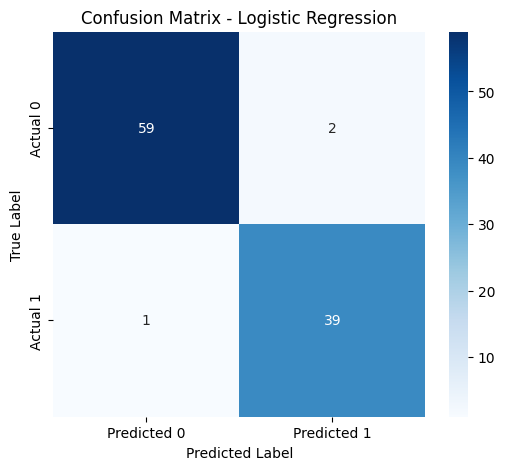

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Confusion Matrix for Logistic Regression ---
cm_log_reg = confusion_matrix(Test_Y, log_reg_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

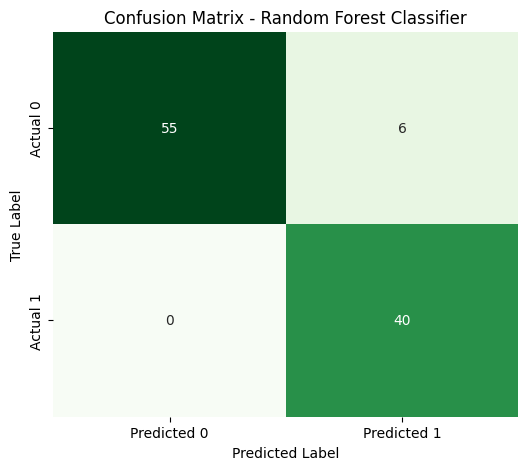

In [61]:
# --- Confusion Matrix for Random Forest ---
cm_rf = confusion_matrix(Test_Y, rf_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Here we are able to see that the variable area_worst has contributed the largest percentage in classification of the breast cancer while symmetry_mean has contributed the least in the model.

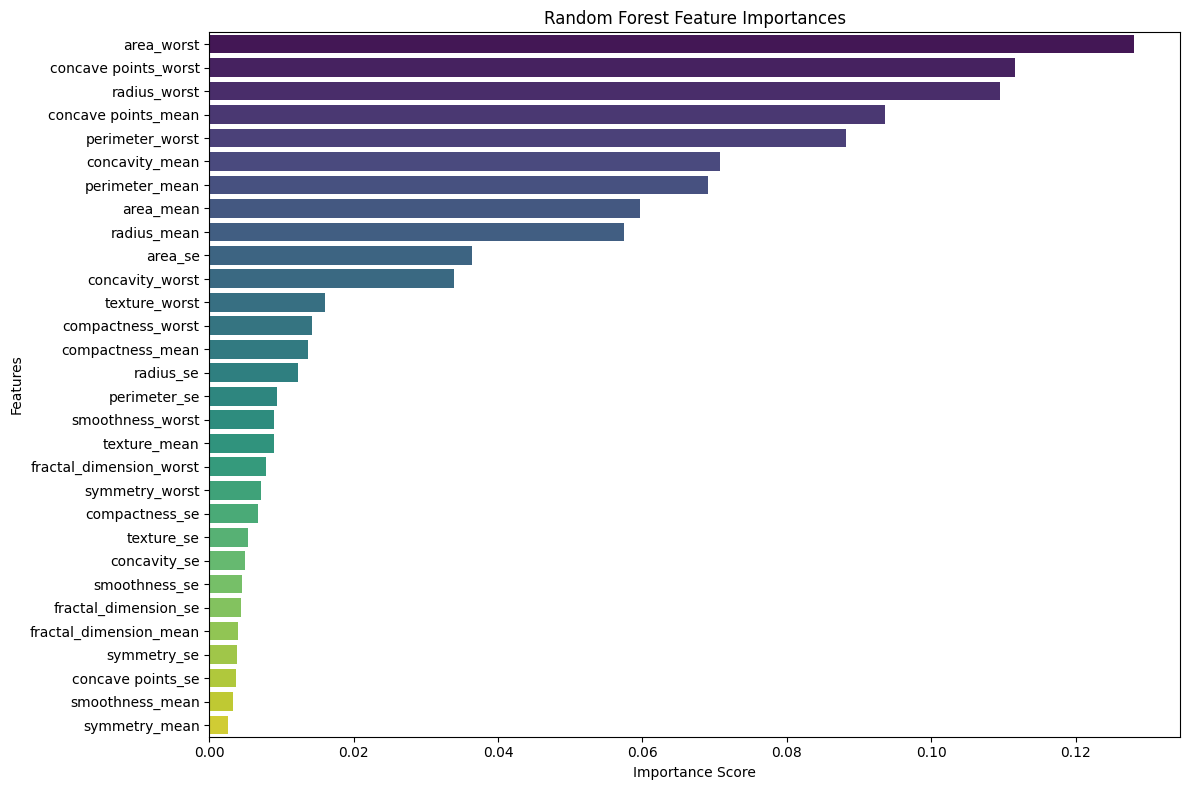

Top 10 features by importance:
|                      | 0         |
|:---------------------|:----------|
| area_worst           | 0.12807   |
| concave points_worst | 0.111679  |
| radius_worst         | 0.109543  |
| concave points_mean  | 0.0936229 |
| perimeter_worst      | 0.0881605 |
| concavity_mean       | 0.070749  |
| perimeter_mean       | 0.069137  |
| area_mean            | 0.0596074 |
| radius_mean          | 0.0574416 |
| area_se              | 0.0363733 |


In [62]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization and sorting
features_df = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Top 10 features by importance:")
print(features_df.head(10).to_markdown(numalign="left", stralign="left"))

STEP 6 MODEL PREDICTION

In [63]:
# Make predictions on the test set using Logistic Regression
log_reg_predictions_test = log_reg_model.predict(Test_X_std)
print("Predictions made by Logistic Regression model.")

# Make predictions on the test set using Random Forest Classifier
rf_predictions_test = rf_model.predict(Test_X_std)
print("Predictions made by Random Forest Classifier model.")

print("\nFirst 10 Logistic Regression predictions:")
print(log_reg_predictions_test[:10])

print("\nFirst 10 Random Forest predictions:")
print(rf_predictions_test[:10])

Predictions made by Logistic Regression model.
Predictions made by Random Forest Classifier model.

First 10 Logistic Regression predictions:
[0 0 0 1 1 0 1 1 0 0]

First 10 Random Forest predictions:
[0 0 0 1 1 0 1 1 0 0]


Here we selected the best model based on the accuracy score of every model.

In [ ]:
log_reg_accuracy = accuracy_score(Test_Y, log_reg_predictions)
rf_accuracy = accuracy_score(Test_Y, rf_predictions)

print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

if log_reg_accuracy > rf_accuracy:
    print("\nBased on accuracy, the best model is: Logistic Regression")
elif rf_accuracy > log_reg_accuracy:
    print("\nBased on accuracy, the best model is: Random Forest Classifier")
else:
    print("\nBoth models have the same accuracy.")

Logistic Regression Accuracy: 0.9703
Random Forest Accuracy: 0.9406

Based on accuracy, the best model is: Logistic Regression
